# Projekt2 KM1

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("online_shoppers_intention.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
data.duplicated().value_counts()

False    12205
True       125
dtype: int64

In [6]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [19]:
caterogical=["Month","VisitorType","OperatingSystems", "Browser", "Region", "TrafficType"]
numerical=["Administrative","Administrative_Duration","Informational","Informational_Duration",
           "ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay",]
boolean=["Weekend","Revenue"]

In [8]:
data["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [9]:
data["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [10]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Zmienne numeryczne

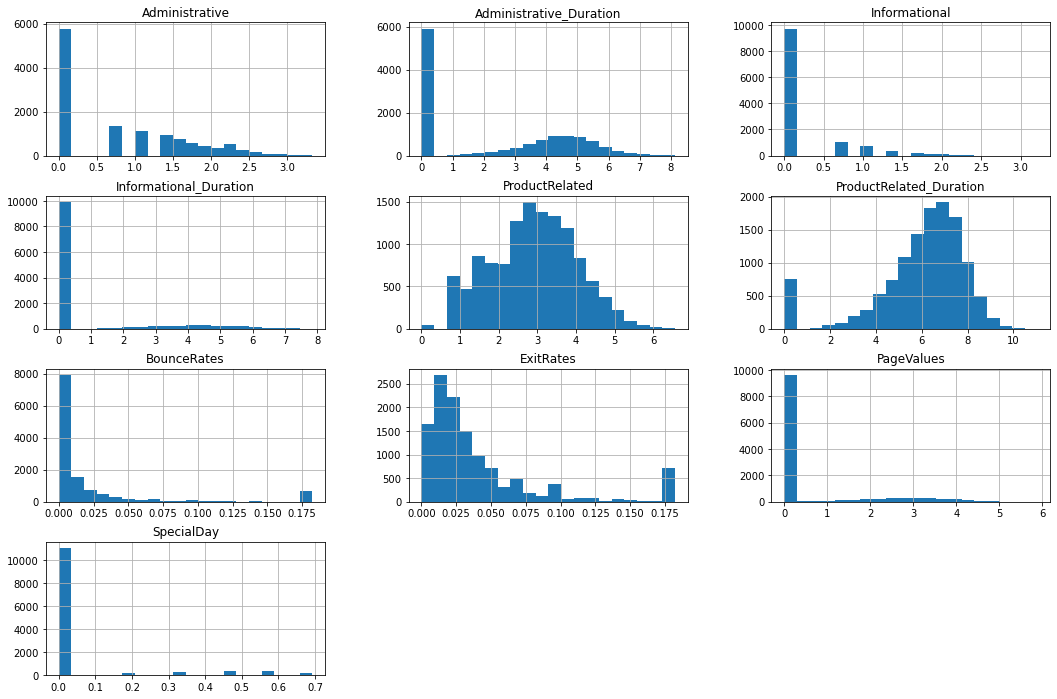

In [20]:
data[numerical]
data2=np.log(data[numerical]+1)
data2[numerical].hist(bins = 20, figsize=(18, 12))
plt.show()

<AxesSubplot:>

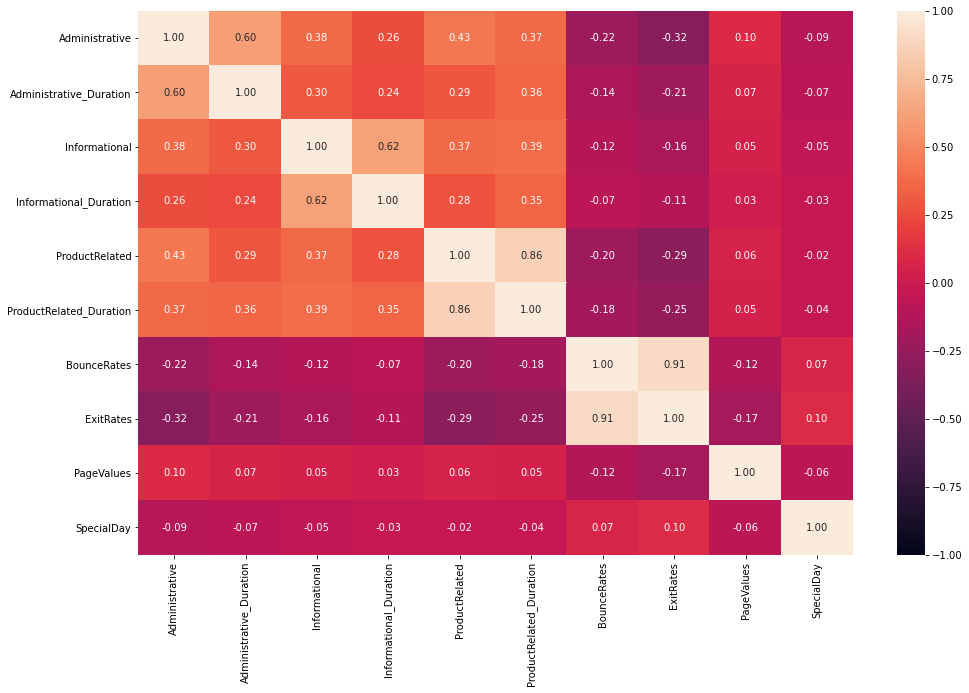

In [18]:
plt.figure(figsize=(16, 10))
sns.heatmap(data[["Administrative","Administrative_Duration","Informational","Informational_Duration",
           "ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay"]].corr(), annot=True, vmin=-1, fmt=".2f")

## Zmienne kategoryczne


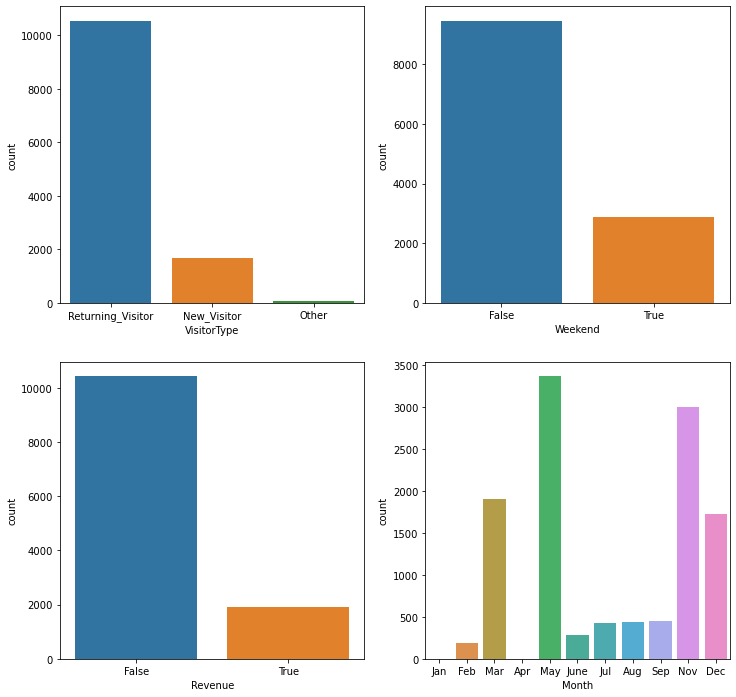

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.countplot(data=data, ax=axes[0][0], x="VisitorType")
sns.countplot(data=data, ax=axes[0][1], x="Weekend")
sns.countplot(data=data, ax=axes[1][0], x="Revenue")
sns.countplot(data=data, ax=axes[1][1], x="Month", 
              order=["Jan", "Feb", "Mar", "Apr", "May", "June","Jul", "Aug", "Sep", "Nov", "Dec"])
plt.show()

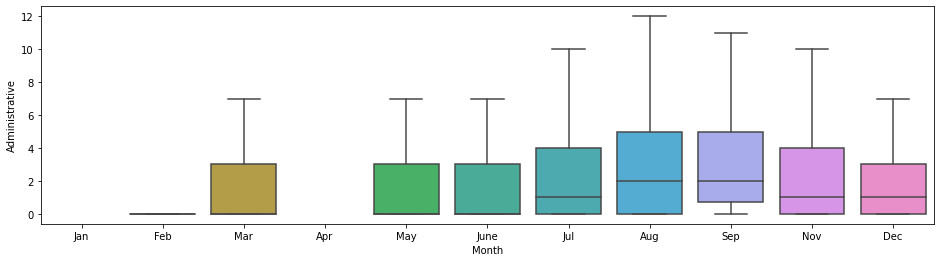

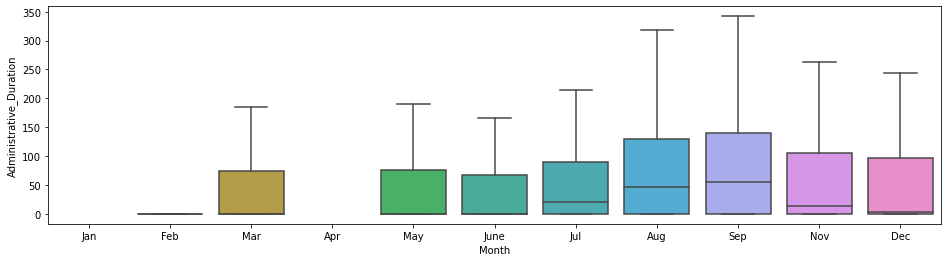

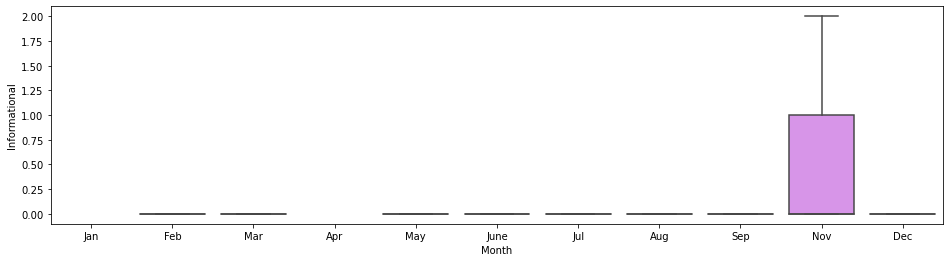

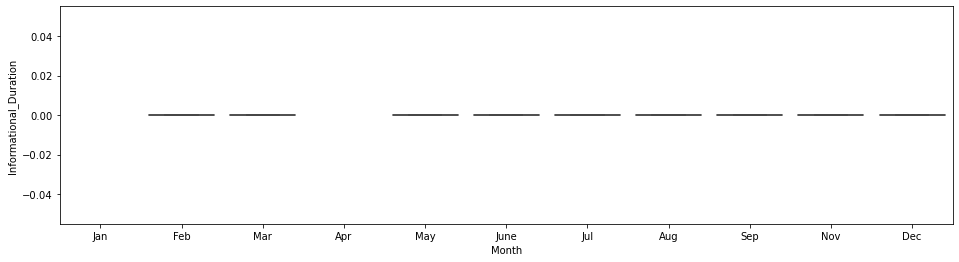

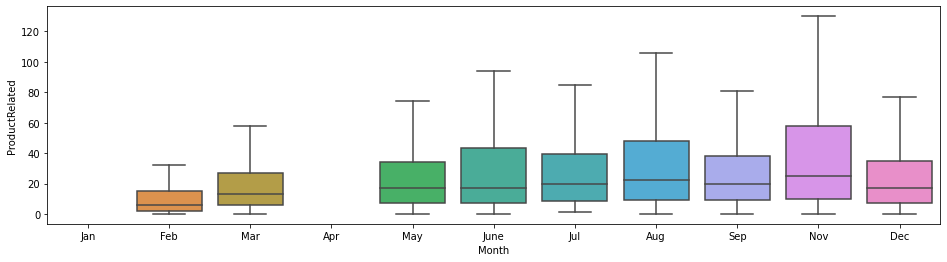

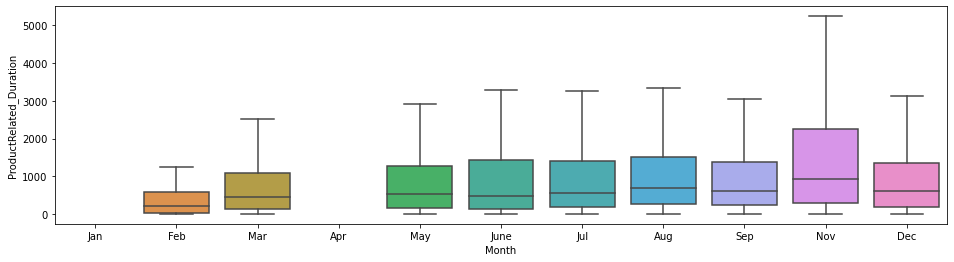

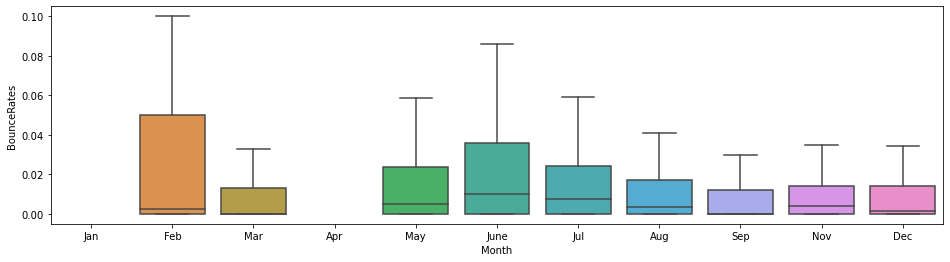

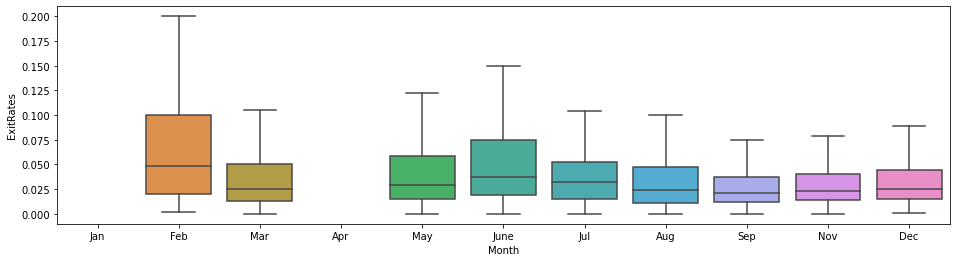

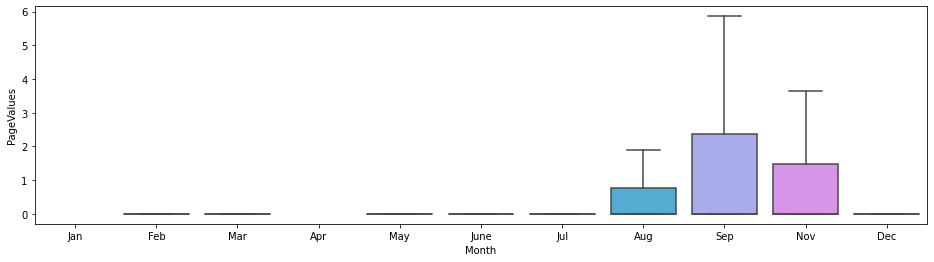

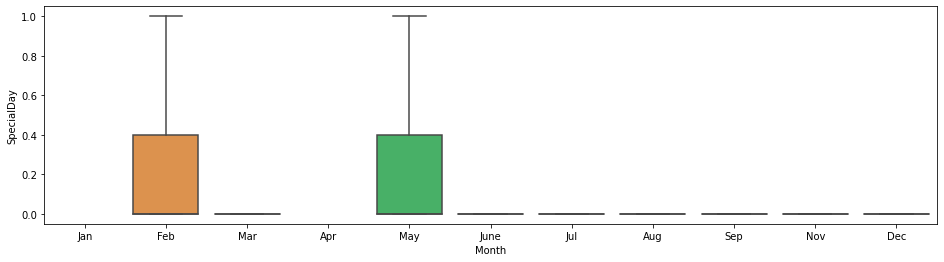

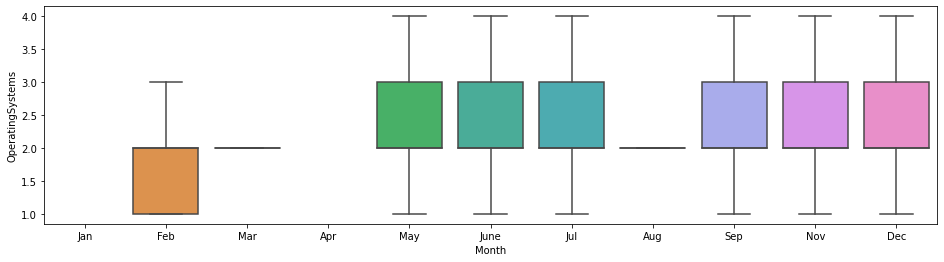

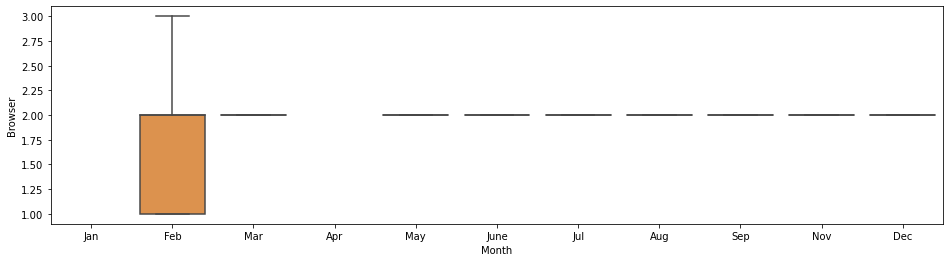

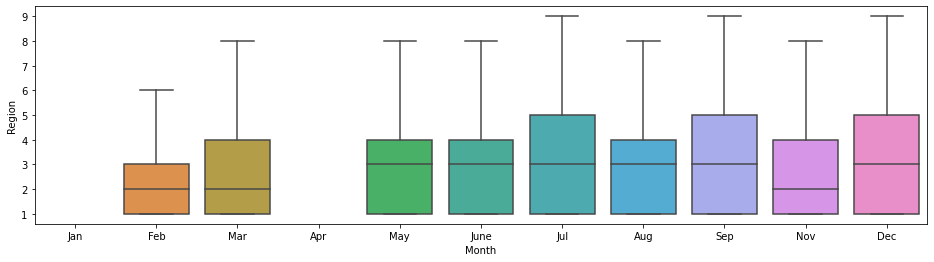

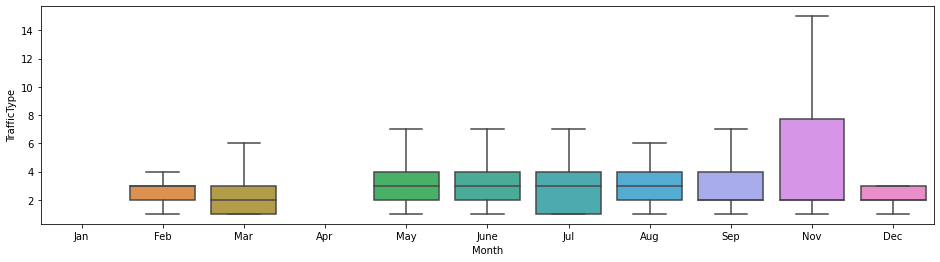

In [17]:
for col in numerical:
    plt.figure(figsize=(16,4))
    sns.boxplot(x="Month", y=col, data=data,showfliers = False,
                order=["Jan", "Feb", "Mar", "Apr", "May", "June","Jul", "Aug", "Sep", "Nov", "Dec"])
    plt.show()

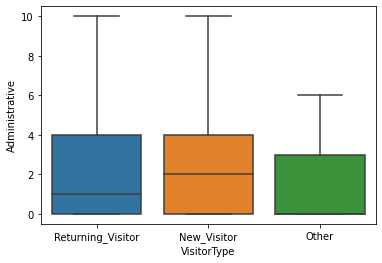

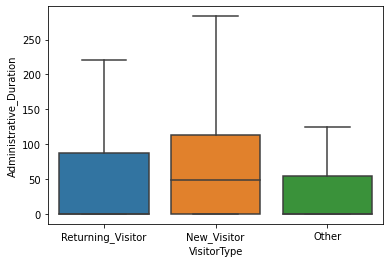

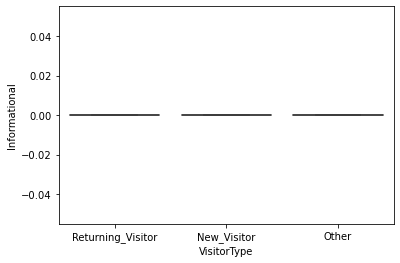

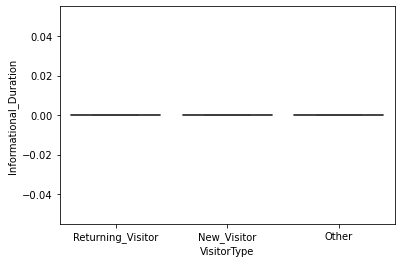

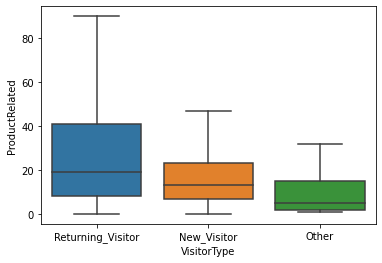

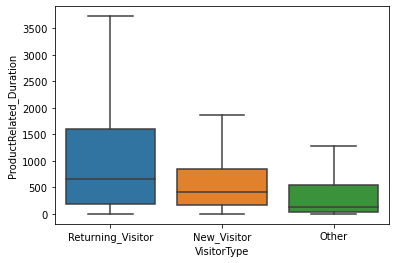

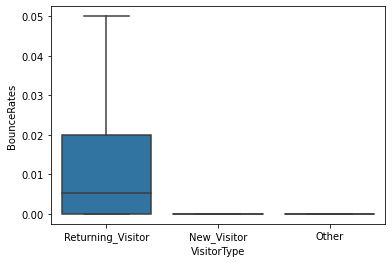

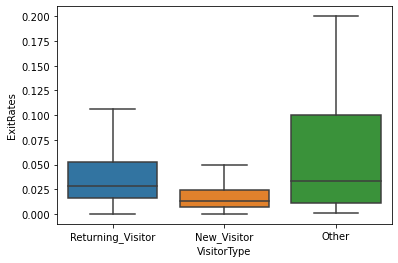

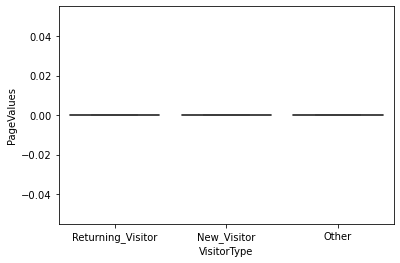

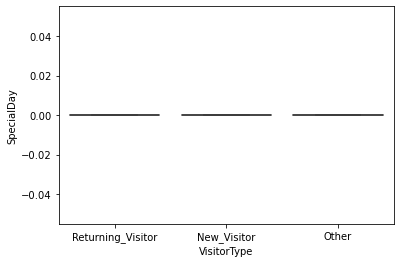

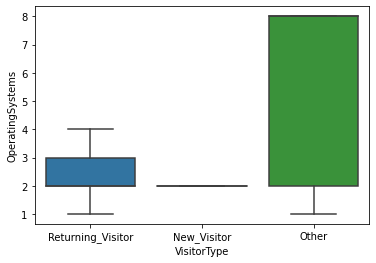

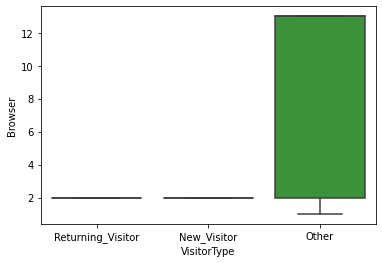

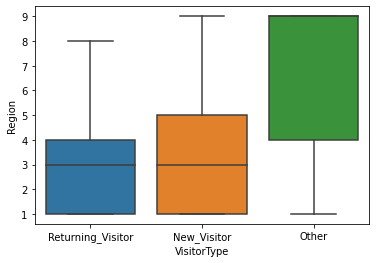

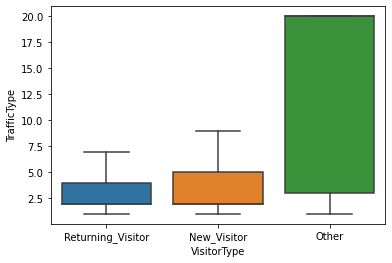

In [20]:
for col in numerical:
    sns.boxplot(x="VisitorType", y=col, data=data,showfliers = False)
    plt.show()

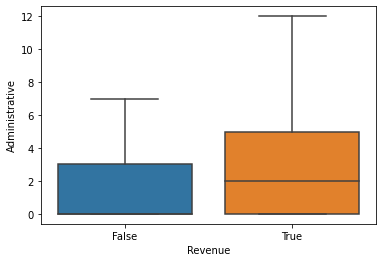

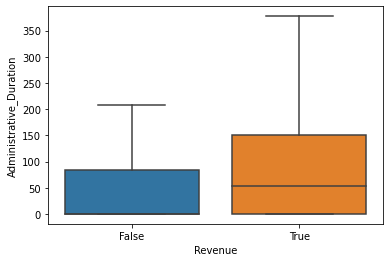

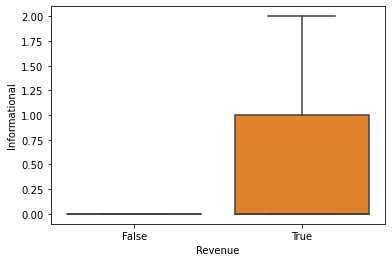

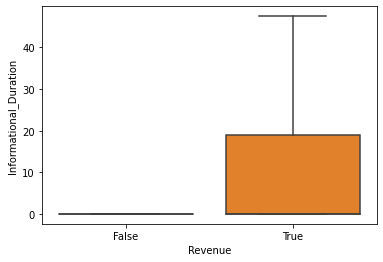

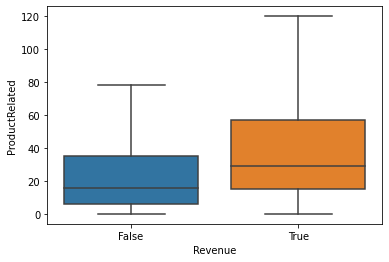

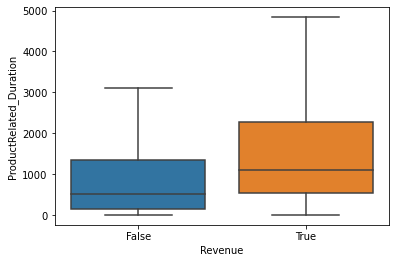

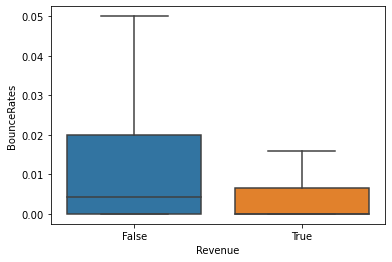

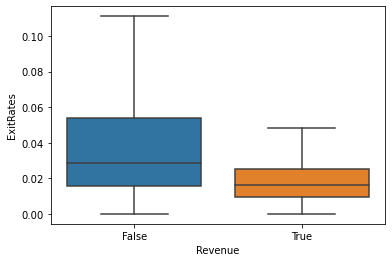

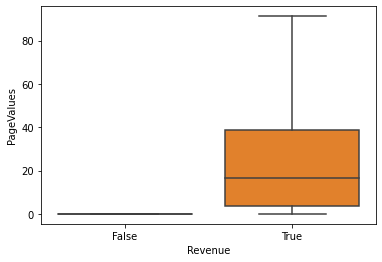

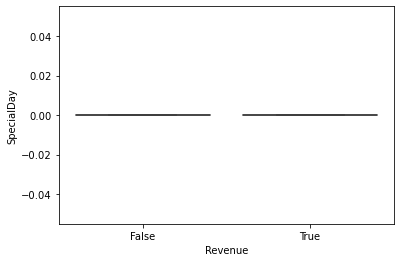

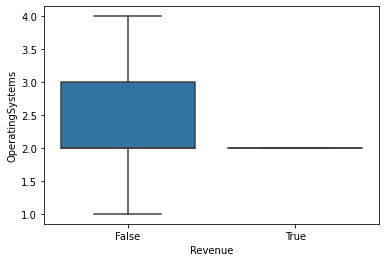

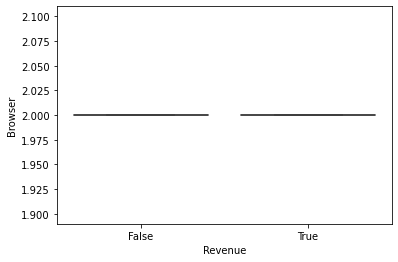

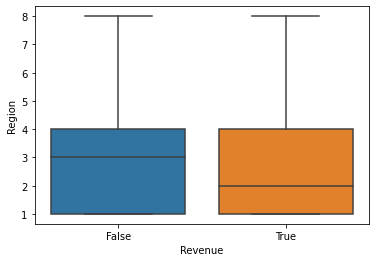

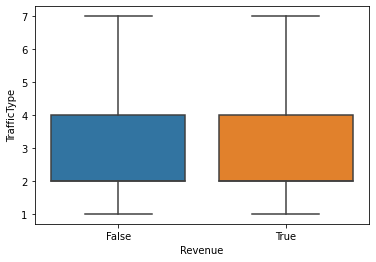

In [21]:
for col in numerical:
    sns.boxplot(x='Revenue', y=col, data=data,showfliers = False)
    plt.show()